# Task 4: Sales Prediction Using Python


Import Libraries

In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

Import Datasets

In [2]:
advertising = pd.read_csv("C:\\Users\\Komal\\Desktop\\Advertising.csv")

In [3]:
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
advertising.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
advertising.shape

(200, 5)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
advertising.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Data Cleaning

In [8]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

Unnamed: 0    0.0
TV            0.0
Radio         0.0
Newspaper     0.0
Sales         0.0
dtype: float64

C:\Users\Komal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Komal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Komal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


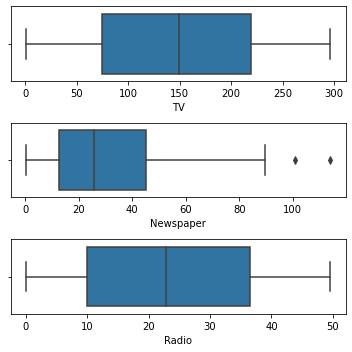

In [9]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

In [10]:
# There are no considerable outliers present in the data.

# Exploratory Data Analysis 

Univariate Analysis

Sales (Target Variable)

C:\Users\Komal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


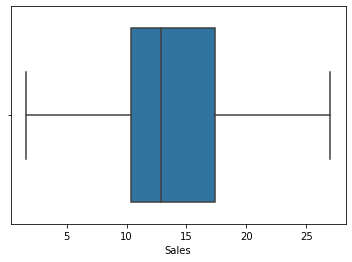

In [11]:
sns.boxplot(advertising['Sales'])
plt.show()

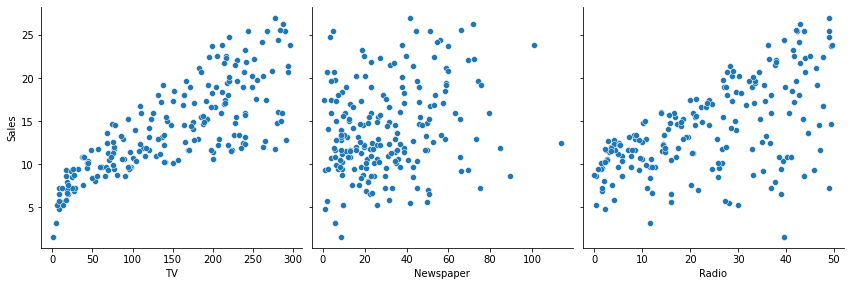

In [12]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

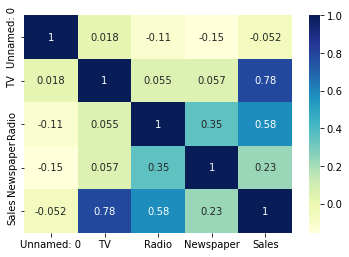

In [13]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Pair Plot Observation

<AxesSubplot:title={'center':'Histogram of Newspaper advertisement costs'}, ylabel='Frequency'>

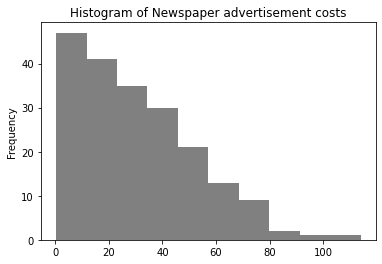

In [14]:
advertising['Newspaper'].plot.hist(bins=10,color='grey',title='Histogram of Newspaper advertisement costs')

<AxesSubplot:title={'center':'Histogram of Sales advertisement costs'}, ylabel='Frequency'>

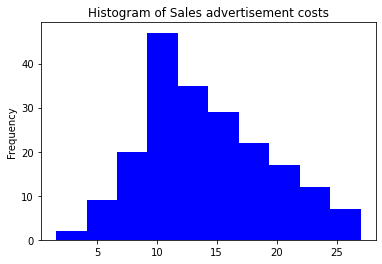

In [15]:
advertising['Sales'].plot.hist(bins=10,color='blue',title='Histogram of Sales advertisement costs')

<AxesSubplot:title={'center':'Histogram of TV advertisement costs'}, ylabel='Frequency'>

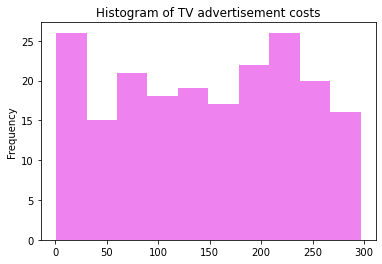

In [16]:
advertising['TV'].plot.hist(bins=10,color='violet',title='Histogram of TV advertisement costs')

<AxesSubplot:title={'center':'Histogram of Radio advertisement costs'}, ylabel='Frequency'>

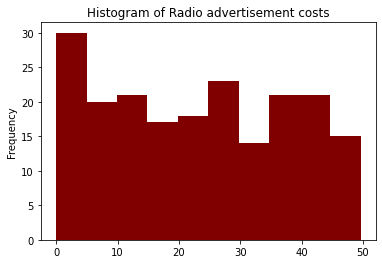

In [17]:
advertising['Radio'].plot.hist(bins=10,color='maroon',title='Histogram of Radio advertisement costs')

# Model Building

In [18]:
X = advertising['TV']
y = advertising['Sales']

Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [20]:
X_train.head()

169    284.3
97     184.9
31     112.9
12      23.8
35     290.7
Name: TV, dtype: float64

In [21]:
y_train.head()

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
Name: Sales, dtype: float64

In [22]:
X_train.shape

(140,)

In [23]:
print(X_train)

169    284.3
97     184.9
31     112.9
12      23.8
35     290.7
       ...  
106     25.0
14     204.1
92     217.7
179    165.6
102    280.2
Name: TV, Length: 140, dtype: float64


In [24]:
X_test.shape

(60,)

In [25]:
print(y_train)

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 140, dtype: float64


In [26]:
print(y_test)

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: Sales, dtype: float64


Building a Linear Model

In [27]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [28]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

C:\Users\Komal\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    7.239460
TV       0.046408
dtype: float64

In [30]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     185.6
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           2.55e-27
Time:                        19:00:25   Log-Likelihood:                -367.70
No. Observations:                 140   AIC:                             739.4
Df Residuals:                     138   BIC:                             745.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2395      0.604     11.986      0.0

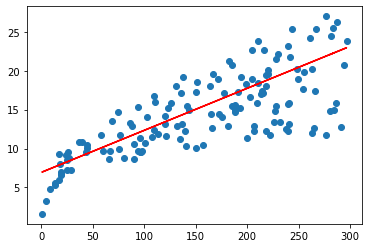

In [31]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

# Model Evaluation

In [32]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\Komal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


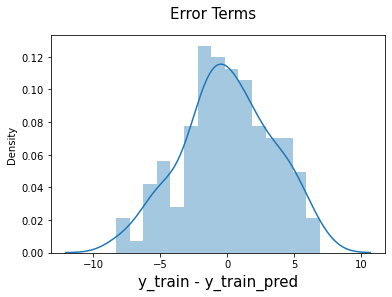

In [33]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

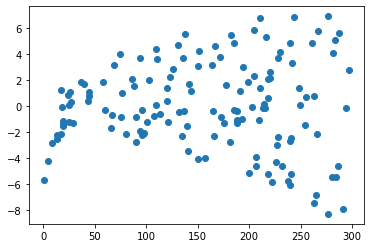

In [34]:
plt.scatter(X_train,res)
plt.show()